In [ ]:
import os  # Import os module for file and directory operations
import matplotlib.pyplot as plt  # Import matplotlib for plotting graphs
import cv2  # Import OpenCV for image processing
from collections import Counter  # Import Counter for counting occurrences
import kagglehub  # Import Kaggle Hub

In [ ]:
# Download latest version of the dataset
dataset_path = kagglehub.dataset_download("msambare/fer2013")  # Download dataset
print("Path to dataset files:", dataset_path)  # Print dataset path

100%|██████████| 60.3M/60.3M [00:02<00:00, 28.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1


In [ ]:
# Define paths for the training and testing directories
training_directory = '/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train'  # Path to the training data directory
testing_directory = '/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test'  # Path to the testing data directory

In [ ]:
# Function to count images in each class (folder)
def count_images_per_class(directory):  # Define function to count images in a given directory
    class_image_counts = {}  # Initialize a dictionary to store counts of images per class
    for emotion in os.listdir(directory):  # Iterate through each emotion folder in the directory
        class_folder_path = os.path.join(directory, emotion)  # Get the full path to the class folder
        if os.path.isdir(class_folder_path):  # Check if the path is a directory
            num_images = len(os.listdir(class_folder_path))  # Count the number of images in the folder
            class_image_counts[emotion] = num_images  # Store the count in the dictionary
    return class_image_counts  # Return the dictionary with counts

In [ ]:
# Get counts of images per class in the training and testing sets
training_image_counts = count_images_per_class(training_directory)  # Count images in the training set
testing_image_counts = count_images_per_class(testing_directory)  # Count images in the testing set

In [ ]:
# Display counts for training data
print("Training data distribution:")  # Print header for training data distribution
for emotion, count in training_image_counts.items():  # Iterate through training image counts
    print(f"{emotion}: {count} images")  # Print the emotion and its corresponding image count

Training data distribution:
surprise: 3171 images
angry: 3995 images
neutral: 4965 images
happy: 7215 images
disgust: 436 images
fear: 4097 images
sad: 4830 images


In [ ]:
# Display counts for testing data
print("\nTest data distribution:")  # Print header for test data distribution
for emotion, count in testing_image_counts.items():  # Iterate through testing image counts
    print(f"{emotion}: {count} images")  # Print the emotion and its corresponding image count


Test data distribution:
surprise: 831 images
angry: 958 images
neutral: 1233 images
happy: 1774 images
disgust: 111 images
fear: 1024 images
sad: 1247 images


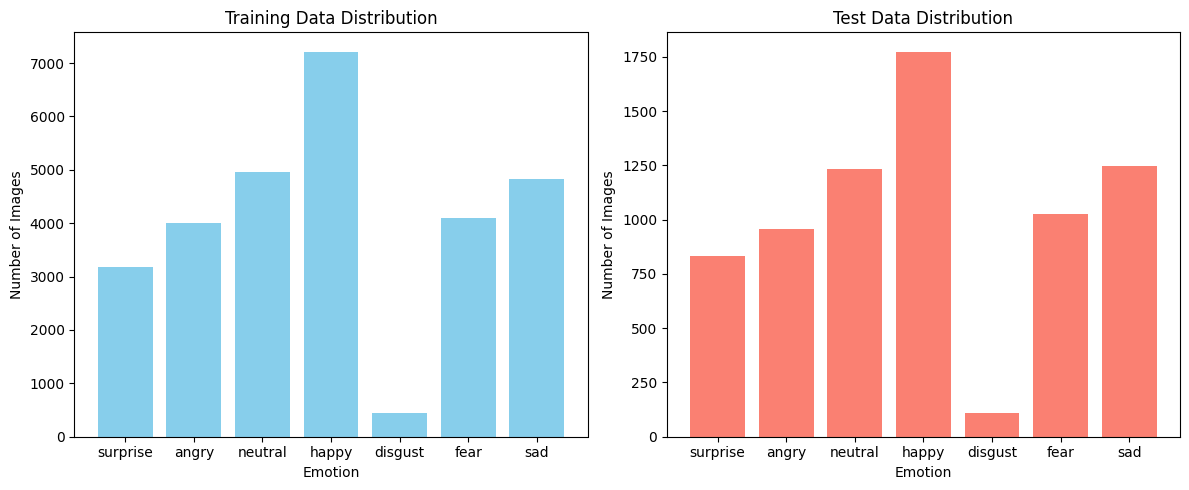

In [ ]:
# Plot the data distribution for training and testing sets
plt.figure(figsize=(12, 5))  # Set the figure size for the plots

# Plot for training data
plt.subplot(1, 2, 1)  # Create a subplot for training data
plt.bar(training_image_counts.keys(), training_image_counts.values(), color='skyblue')  # Create a bar plot for training counts
plt.title('Training Data Distribution')  # Set the title for the training data plot
plt.xlabel('Emotion')  # Set the x-axis label
plt.ylabel('Number of Images')  # Set the y-axis label

# Plot for testing data
plt.subplot(1, 2, 2)  # Create a subplot for testing data
plt.bar(testing_image_counts.keys(), testing_image_counts.values(), color='salmon')  # Create a bar plot for testing counts
plt.title('Test Data Distribution')  # Set the title for the testing data plot
plt.xlabel('Emotion')  # Set the x-axis label
plt.ylabel('Number of Images')  # Set the y-axis label

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()  # Display the plots


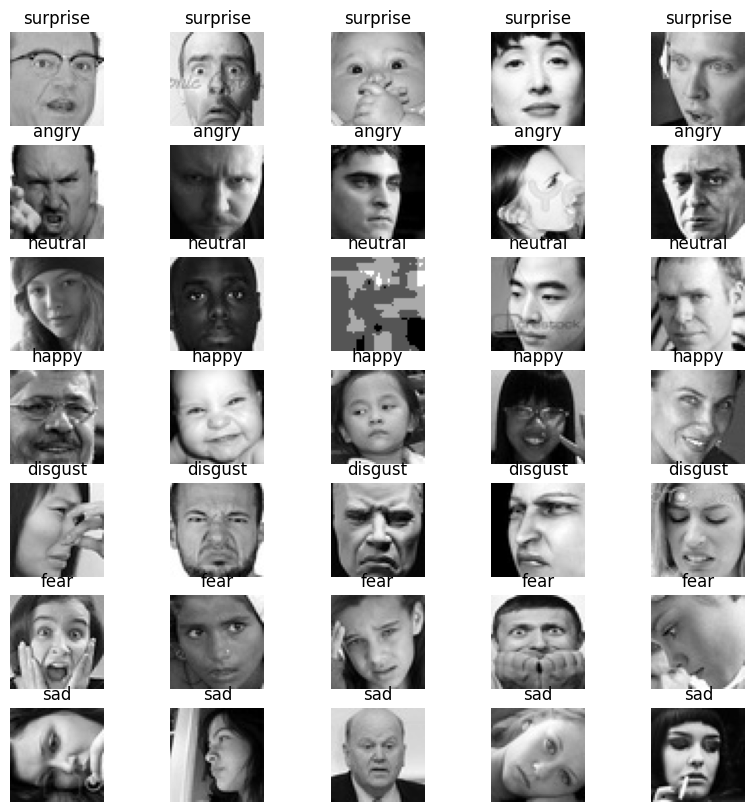

In [ ]:
#Step 2: Display a few sample images from each emotion class in the training set
def show_sample_images(directory, num_samples=5):  # Define function to show sample images from a directory
    plt.figure(figsize=(10, 10))  # Set the figure size for the sample images
    for index, emotion in enumerate(os.listdir(directory)):  # Iterate through each emotion folder
        emotion_folder_path = os.path.join(directory, emotion)  # Get the full path to the emotion folder
        if os.path.isdir(emotion_folder_path):  # Check if the path is a directory
            sample_images = os.listdir(emotion_folder_path)[:num_samples]  # Get the first few images
            for img_index, image_name in enumerate(sample_images):  # Iterate through the selected sample images
                image_path = os.path.join(emotion_folder_path, image_name)  # Get the full path to the image
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image as grayscale
                plt.subplot(len(os.listdir(directory)), num_samples, index * num_samples + img_index + 1)  # Create a subplot for each image
                plt.imshow(image, cmap='gray')  # Display the image in grayscale
                plt.title(emotion)  # Set the title to the emotion class
                plt.axis('off')  # Hide the axes for a cleaner look

show_sample_images(training_directory)  # Call the function to display sample images from the training directory